## Time course based ROI analysis
In this notebook we will take ROI timecourse in the first 30sec of the trauma script and compare different groups and sessions

In [1]:
import numpy as np
import pandas as pd
import nilearn
from nilearn import plotting
import glob
import os
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
from connUtils import removeVars, timeSeriesSingle
import scipy
work_dir = '/media/Data/work/KPE_ROI/timecourse'

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
# put functional file, confound file and event file here - this is for one subject
func_file = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-Memory_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz'
confound_file = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-Memory_desc-confounds_regressors.tsv'
events_file = '/media/Data/KPE_BIDS/condition_files/withNumbers/sub-{sub}_ses-{ses}_30sec_window.csv'

### Amygdala

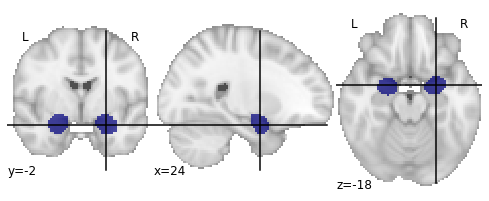

In [2]:
mask_file = '/media/Data/work/KPE_ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=19", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

In [ ]:
# here I use a masked image so all will have same size - create a function that does that
def generate_timeSeries(sub, ses, mask_file): 
    nifti_masker = NiftiMasker(
        mask_img= mask_file,
        smoothing_fwhm=4, standardize=True, t_r=1,high_pass = .01,
         verbose=5)  # cache options
    fmri_masked_ses = nifti_masker.fit_transform(func_file.format(sub=sub, ses=ses), confound_file.format(sub=sub, ses=ses))
    # memory= os.path.join(work_dir,'nilearn_cache_alternative'), memory_level=0,
    return fmri_masked_ses

def plot_series(time1, time2):
    # recieves two time series and returns a graph of the two with std's
    time1_mean = np.mean(time1, axis=0)
    time1_std = np.std(time1, axis=0)
    smooth_path    = time1_mean
    under_line     = (smooth_path - time1_std)
    over_line      = (smooth_path + time1_std)
    time2_mean = np.mean(time2, axis=0)
    time2_std = np.std(time2, axis=0)
    smooth_path2    = time2_mean
    under_line2     = (smooth_path2 - time2_std)
    over_line2      = (smooth_path2 + time2_std)
    plt.figure(figsize = [10,5])
    plt.plot(time1_mean, "blue")
    plt.fill_between(range(120), under_line, over_line, color='b', alpha=.1)
    plt.plot(time2_mean, "red")
    plt.fill_between(range(120), under_line2, over_line2, color='r', alpha=.1)

In [ ]:
import pandas as pd
medication_cond = pd.read_csv('/home/or/kpe_task_analysis/task_based_analysis/kpe_sub_condition.csv')

ketamine_list = list(medication_cond['scr_id'][medication_cond['med_cond']==1])
ket_list = []
for subject in ketamine_list:
    print(subject)
    sub = subject.split('KPE')[1]
    ket_list.append(sub)


midazolam_list = list(medication_cond['scr_id'][medication_cond['med_cond']==0])
mid_list = []
for subject in midazolam_list:
    print(subject)
    sub = subject.split('KPE')[1]
    mid_list.append(sub)
mid_list.remove('1480')

In [ ]:
ket_func1 = []
for sub in ket_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    ket_func1.append(timeSer1mean[t1:t1+120])
np.save('ket_func1_amg_sad', ket_func1)

In [ ]:
ket_func2 = []
for sub in ket_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    ket_func2.append(timeSer2mean[t2:t2+120])
np.save('ket_func2_amg_sad', ket_func2)

In [ ]:
mid_func1 = []
for sub in mid_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    mid_func1.append(timeSer1mean[t1:t1+120])
np.save('mid_func1_amg_sad', mid_func1)

In [ ]:
mid_func2 = []
for sub in mid_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    mid_func2.append(timeSer2mean[t2:t2+120])
np.save('mid_func2_amg_sad', mid_func2)

In [ ]:
plot_series(ket_func1, ket_func2)
plot_series(mid_func1, mid_func2)

In [ ]:
# Calculate correlation between first and seond session in this timecourse. 
cor_mid = []
for i in range(len(mid_func1)):
    cor = scipy.stats.pearsonr(mid_func1[i], mid_func2[i])#, rowvar=False)
    cor_mid.append(cor)
np.mean(np.array(cor_mid)[:,0])

In [ ]:
# removing one subject that has problems in data in session 2 (1351)
np.array(mid_func2).shape
del mid_func2[2]
del mid_func1[2]

##
del mid_func1[4]
del mid_func2[4]

## generating boxplot to show the activation around the peak (3-15 sec)

In [ ]:
# before that, lets see where are the global maximums of each subject (location = second in the script)
ket1=[]
for mat in ket_func1:
    print(np.argmax(mat))
    ket1.append(np.argmax(mat))
ket2 = []
for mat in ket_func2:
    print(np.argmax(mat))
    ket2.append(np.argmax(mat))

In [ ]:
mid1 = []
for mat in mid_func1:
    
    mid1.append(np.argmax(mat))
mid2 = []
for mat in mid_func2:
    print(np.argmax(mat))
    mid2.append(np.argmax(mat))

In [ ]:
# lets plot the locations of maximums for subject
plt.figure(figsize = [10,5])
plt.scatter(ket_list + mid_list,ket1 + mid1, color = "blue", alpha = 0.6)
plt.scatter(ket_list + mid_list , ket2 + mid2 , color = "red", alpha = 0.3)


In [ ]:
# boxplot on the first part of script
#ket1_mean = np.mean(ket_func1, axis=0)
mid1_mean = np.mean(mid_func1[5:20], axis=1)
mid2_mean = np.mean(mid_func2[5:20], axis=1)
ket1_mean = np.mean(ket_func1[5:20], axis=1)
ket2_mean = np.mean(ket_func2[5:20], axis=1)
plt.figure(figsize = [10,5])
plt.boxplot([ket1_mean, ket2_mean, mid1_mean, mid2_mean])
#plt.boxplot([ket1_mean[0:15], ket2_mean[0:15]])

In [ ]:
# now lets built it around individual global maximum
def maxVec(funcArr):
    vec = []
    for mat in funcArr:
        vec.append(np.argmax(mat))
    maxi = []
    for i, x in enumerate(vec):
        maxi.append(funcArr[i][x])
    return maxi

In [ ]:
ket1_max = maxVec(ket_func1)
ket2_max = maxVec(ket_func2)
mid1_max = maxVec(mid_func1)
mid2_max = maxVec(mid_func2)

In [ ]:
mid1_max

In [ ]:
plt.figure(figsize = [10,5])
labels = ['','Ket_ses1', 'Ket_ses2', 'Mid_ses1', 'Mid_ses2']
x_pos = np.arange(len(labels))
plt.boxplot([ket1_max, ket2_max, mid1_max, mid2_max])
plt.xticks(x_pos, labels)
print(f' T test for ketamine group diff {scipy.stats.ttest_rel(ket1_max, ket2_max)}')
print (f'T test for midazolam group {scipy.stats.ttest_rel(mid1_max, mid2_max)}')


## Hippocampus

In [ ]:
mask_file = '/media/Data/work/KPE_ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=12", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

In [ ]:
ket_func1 = []
for sub in ket_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    ket_func1.append(timeSer1mean[t1:t1+120])
np.save('ket_func1_hippo_sad', ket_func1)

In [ ]:
ket_func2 = []
for sub in ket_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    ket_func2.append(timeSer2mean[t2:t2+120])
np.save('ket_func2_hippo_sad', ket_func2)

In [ ]:
mid_func1 = []
for sub in mid_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    mid_func1.append(timeSer1mean[t1:t1+120])
np.save('mid_func1_hippo_sad', mid_func1)

In [ ]:
mid_func2 = []
for sub in mid_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    mid_func2.append(timeSer2mean[t2:t2+120])
np.save('mid_func2_hippo_sad', mid_func2)

In [ ]:
plot_series(ket_func1, ket_func2)

In [ ]:
plot_series(mid_func1, mid_func2)

In [ ]:

x1 = np.array(mid_func1)
x2 = np.array(mid_func2)
a = scipy.signal.correlate(x1,x2)
a.shape
#plt.xcorr(x1, x2)
a[0].shape

## vmPFC

In [ ]:
mask_file = '/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz'
#mask_file = nilearn.image.math_img("a>=12", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

In [ ]:
ket_func1 = []
for sub in ket_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    ket_func1.append(timeSer1mean[t1:t1+120])
np.save('ket_func1_vmPFC_sad', ket_func1)
ket_func2 = []
for sub in ket_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    ket_func2.append(timeSer2mean[t2:t2+120])
np.save('ket_func2_vmPFC_sad', ket_func2)

In [ ]:
mid_func1 = []
for sub in mid_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    mid_func1.append(timeSer1mean[t1:t1+120])
np.save('mid_func1_vmPFC_sad', mid_func1)
mid_func2 = []
for sub in mid_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    mid_func2.append(timeSer2mean[t2:t2+120])
np.save('mid_func2_vmPFC_sad', mid_func2)

In [ ]:
plot_series(mid_func1, mid_func2)
plot_series(ket_func1, ket_func2)

In [ ]:
ket1_max = maxVec(ket_func1)
ket2_max = maxVec(ket_func2)
mid1_max = maxVec(mid_func1)
mid2_max = maxVec(mid_func2)
plt.figure(figsize = [10,5])
plt.boxplot([ket1_max, ket2_max, mid1_max, mid2_max])
print(f' T test for ketamine group diff {scipy.stats.ttest_rel(ket1_max, ket2_max)}')
print (f'T test for midazolam group {scipy.stats.ttest_rel(mid1_max, mid2_max)}')


## Striatum

In [ ]:
mask_file = '/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz'
#mask_file = nilearn.image.math_img("a>=12", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

In [ ]:
ket_func1 = []
for sub in ket_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    ket_func1.append(timeSer1mean[t1:t1+120])
np.save('ket_func1_striatum_sad', ket_func1)
ket_func2 = []
for sub in ket_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    ket_func2.append(timeSer2mean[t2:t2+120])
np.save('ket_func2_striatum_sad', ket_func2)

In [ ]:
mid_func1 = []
for sub in mid_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    mid_func1.append(timeSer1mean[t1:t1+120])
np.save('mid_func1_striatum_sad', mid_func1)
mid_func2 = []
for sub in mid_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    mid_func2.append(timeSer2mean[t2:t2+120])
np.save('mid_func2_striatum_sad', mid_func2)

In [ ]:
plot_series(mid_func1, mid_func2)
plot_series(ket_func1, ket_func2)

In [ ]:
ket1_max = maxVec(ket_func1)
ket2_max = maxVec(ket_func2)
mid1_max = maxVec(mid_func1)
mid2_max = maxVec(mid_func2)
plt.figure(figsize = [10,5])
plt.boxplot([ket1_max, ket2_max, mid1_max, mid2_max])
print(f' T test for ketamine group diff {scipy.stats.ttest_rel(ket1_max, ket2_max)}')
print (f'T test for midazolam group {scipy.stats.ttest_rel(mid1_max, mid2_max)}')

## vACC

In [ ]:
mask_file = '/media/Data/work/KPE_ROI/ventral anterior_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=4", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

In [ ]:
ket_func1 = []
for sub in ket_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    ket_func1.append(timeSer1mean[t1:t1+120])
np.save('ket_func1_vACC_sad', ket_func1)
ket_func2 = []
for sub in ket_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    ket_func2.append(timeSer2mean[t2:t2+120])
np.save('ket_func2_vACC_sad', ket_func2)

In [ ]:
mid_func1 = []
for sub in mid_list:
    timeSer1= generate_timeSeries(sub, '1',mask_file)
    timeSer1mean = np.mean(timeSer1, axis = 1) # average across voxels
    time1 = pd.read_csv(events_file.format(sub=sub, ses='1'), sep='\t')
    t1 = int(round(time1.onset[time1.trial_type_30 =='sad1_0'])) # must be integer
    mid_func1.append(timeSer1mean[t1:t1+120])
np.save('mid_func1_vACC_sad', mid_func1)
mid_func2 = []
for sub in mid_list:
    timeSer2= generate_timeSeries(sub, '2',mask_file)
    timeSer2mean = np.mean(timeSer2, axis = 1) # average across voxels
    time2 = pd.read_csv(events_file.format(sub=sub, ses='2'), sep='\t')
    t2 = int(round(time2.onset[time2.trial_type_30 =='sad1_0'])) # must be integer
    mid_func2.append(timeSer2mean[t2:t2+120])
np.save('mid_func2_vACC_sad', mid_func2)

In [ ]:
for i in range(len(mid_func1)):
    plt.plot(mid_func1[i]) 
    plt.plot(mid_func2[i])   
    plt.show()
#plot_series(ket_func1, ket_func2)

In [ ]:
plt.plot(ket_func1[0])
plt.plot(ket_func1[1])

In [ ]:
ket1_max = maxVec(ket_func1)
ket2_max = maxVec(ket_func2)
mid1_max = maxVec(mid_func1)
mid2_max = maxVec(mid_func2)

plt.figure(figsize = [10,5])
labels = ['','Ket_ses1', 'Ket_ses2', 'Mid_ses1', 'Mid_ses2']
x_pos = np.arange(len(labels))
plt.boxplot([ket1_max, ket2_max, mid1_max, mid2_max])
plt.xticks(x_pos, labels)
print(f' T test for ketamine group diff {scipy.stats.ttest_rel(ket1_max, ket2_max)}')
print (f'T test for midazolam group {scipy.stats.ttest_rel(mid1_max, mid2_max)}')


## Compare timecourse of different regions

In [ ]:
vmPFC = np.load('ket_func1_vmPFC.npy')
amygdala = np.load('ket_func1_amg.npy')
hippo = np.load('ket_func1_hippo.npy')
vACC = np.load('ket_func1_vACC.npy')

In [ ]:
plot_series(hippo,vmPFC)

In [ ]:
for i,x in enumerate(ket_list):
    plt.plot(hippo[i])
    plt.plot(vmPFC[i], color = "red")
    plt.show()